# 🧠 Cybersecurity Specialization: AI Risk Management Framework
## Lab 1: Identify Risks in a Sample AI System (Colab Edition)
---

In [ ]:
# ---- Step 1: Install Required Packages ----
!pip install pandas scikit-learn matplotlib seaborn --quiet

In [ ]:
# ---- Step 2: Import Libraries ----
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ Libraries successfully imported.")

✅ Libraries successfully imported.


In [ ]:
# ---- Step 3: Load Dataset from Root Session Folder ----
# Ensure you have uploaded 'adult.csv' to the root of Colab (i.e., /content/adult.csv)

file_path = "/content/adult.csv"

column_names = [
    "age", "workclass", "fnlwgt", "education", "education.num",
    "marital.status", "occupation", "relationship", "race", "sex",
    "capital.gain", "capital.loss", "hours.per.week", "native.country", "income"
]

data = pd.read_csv(file_path, header=None, names=column_names, na_values="?", skipinitialspace=True)

print("✅ Dataset loaded successfully.\n")
print("Preview of the dataset:")
display(data.head())

✅ Dataset loaded successfully.

Preview of the dataset:


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# ---- Step 4: Clean & Prepare Data ----
selected_cols = ["age", "education.num", "sex", "race", "hours.per.week", "income"]
data = data[selected_cols]

data["income"] = data["income"].apply(lambda x: 1 if str(x).strip() == ">50K" else 0)

data = pd.get_dummies(data, drop_first=True)

X = data.drop("income", axis=1)
y = data["income"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"✅ Data prepared. Shape: {data.shape}")

✅ Data prepared. Shape: (1000, 9)


In [ ]:
# ---- Step 5: Train the Machine Learning Model ----
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

print("✅ Model trained successfully.\n")
print("Model Performance Metrics:\n")
print(classification_report(y_test, predictions))

✅ Model trained successfully.

Model Performance Metrics:

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       152
           1       0.42      0.33      0.37        48

    accuracy                           0.73       200
   macro avg       0.61      0.59      0.60       200
weighted avg       0.71      0.73      0.72       200



In [ ]:
# ---- Step 6: Identify and Classify Risks ----
risks = {
    "ethical": [
        "Bias in sensitive features like sex or race",
        "Lack of model explainability for stakeholders"
    ],
    "operational": [
        "Risk of model drift over time",
        "No active monitoring or alerting mechanisms in place"
    ],
    "data": [
        "Missing values detected in categorical fields",
        "Possible class imbalance (income >50K vs <=50K)"
    ]
}

print("✅ Identified Risks:\n")
for category, items in risks.items():
    print(f"\n{category.upper()} Risks:")
    for item in items:
        print(f" - {item}")

✅ Identified Risks:


ETHICAL Risks:
 - Bias in sensitive features like sex or race
 - Lack of model explainability for stakeholders

OPERATIONAL Risks:
 - Risk of model drift over time
 - No active monitoring or alerting mechanisms in place

DATA Risks:
 - Missing values detected in categorical fields
 - Possible class imbalance (income >50K vs <=50K)


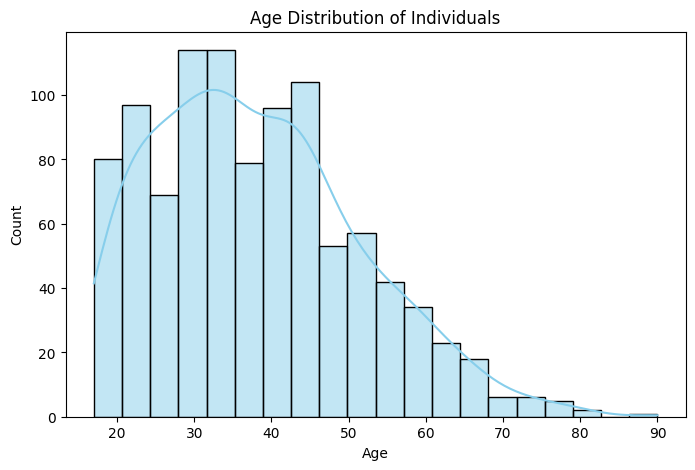

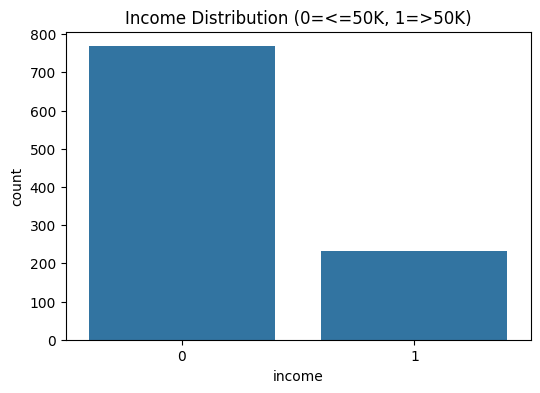

In [ ]:
# ---- Step 7: Visualize Data Distributions (Optional) ----
plt.figure(figsize=(8,5))
sns.histplot(data["age"], bins=20, kde=True, color="skyblue")
plt.title("Age Distribution of Individuals")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x="income", data=data)
plt.title("Income Distribution (0=<=50K, 1=>50K)")
plt.show()

In [ ]:
# ---- Step 8: Reflection Prompt (Optional Interaction) ----
# Uncomment below if you want to interactively respond
# reflection = input("Which risk category (ethical, operational, data) do you think is most underestimated, and why? ")
# print(f"Your response: {reflection}")